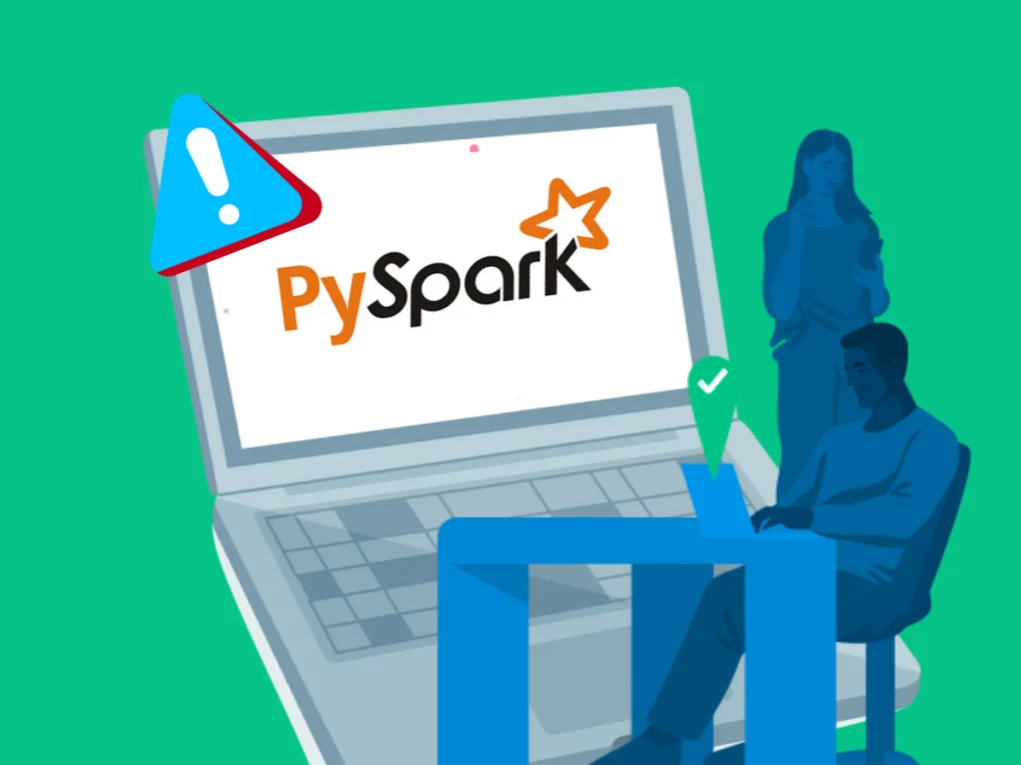

##Introduction to Apache Spark: A Paradigm Shift in Distributed Computing

Apache Spark is a cutting-edge open-source distributed computing framework that has revolutionized large-scale data processing. Unlike traditional disk-based processing systems, Spark leverages the power of in-memory processing, significantly boosting performance and enabling real-time analytics on massive datasets

##In-Memory Processing:

In traditional disk-based processing, data is read from and written to disk, which can be a time-consuming operation due to the mechanical limitations of disk drives. However, Spark takes a radically different approach by keeping the intermediate data in memory whenever possible. This means that once data is loaded into memory, subsequent operations can be performed much faster since they avoid the latency associated with disk I/O.

To illustrate this concept, consider the analogy of retrieving a phone number stored in your mobile phone's memory. When you access a frequently used contact, such as a friend's number, it takes just a couple of seconds to retrieve it from memory, compared to retrieving it from a physical address book, which would take much longer. Similarly, Spark's in-memory processing accelerates data retrieval and computation, leading to significant performance gains.


##Parallel Processing:

Another key feature of Spark is its ability to perform parallel processing across a distributed cluster of machines. Spark divides the data into smaller chunks called partitions and distributes these partitions across multiple worker nodes in the cluster. Each worker node independently processes its assigned partition, allowing computations to be performed in parallel.

One of the most remarkable aspects of Spark is its scalability. Spark clusters can dynamically scale up or down by adding or removing worker nodes based on the computational requirements of the workload. This elastic scalability enables Spark to handle datasets of virtually any size, from terabytes to petabytes, without sacrificing performance

Reading material: https://medium.com/@k12shreyam/spark-for-parallel-processing-ef234b8ca034



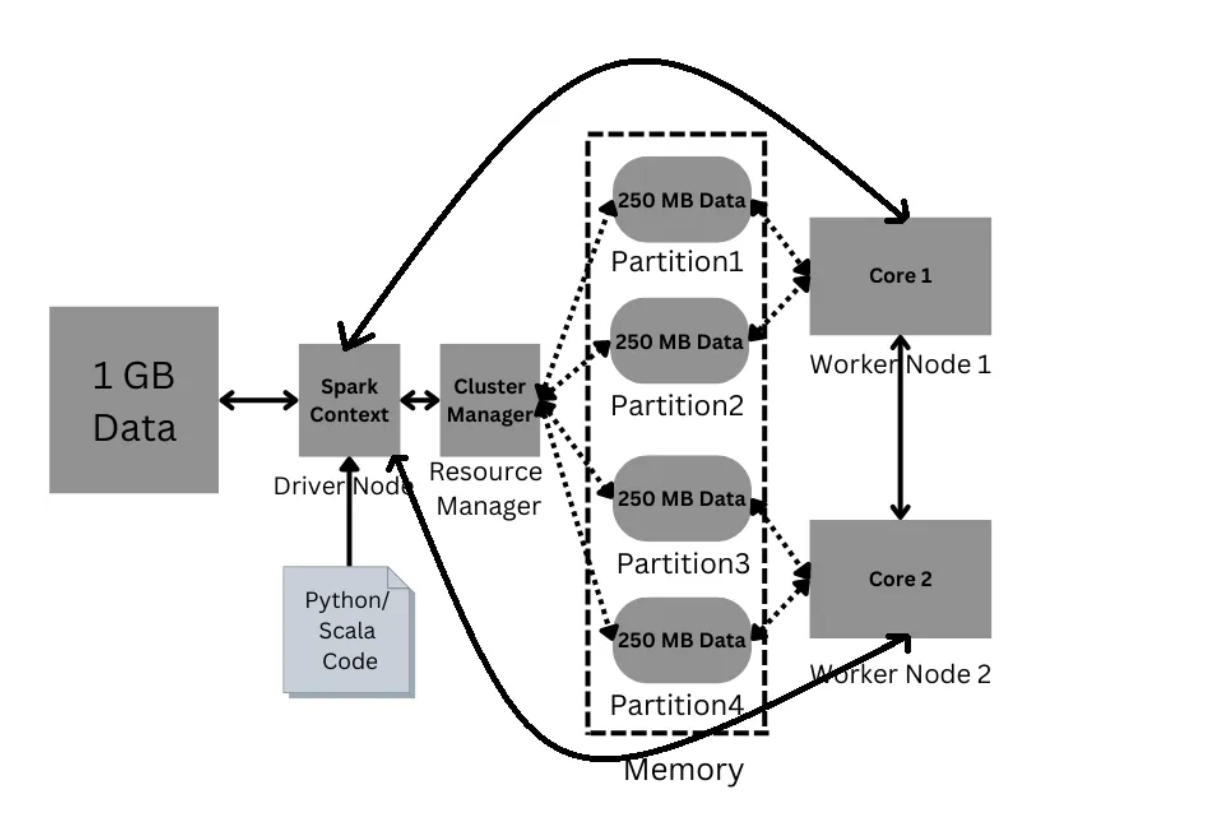

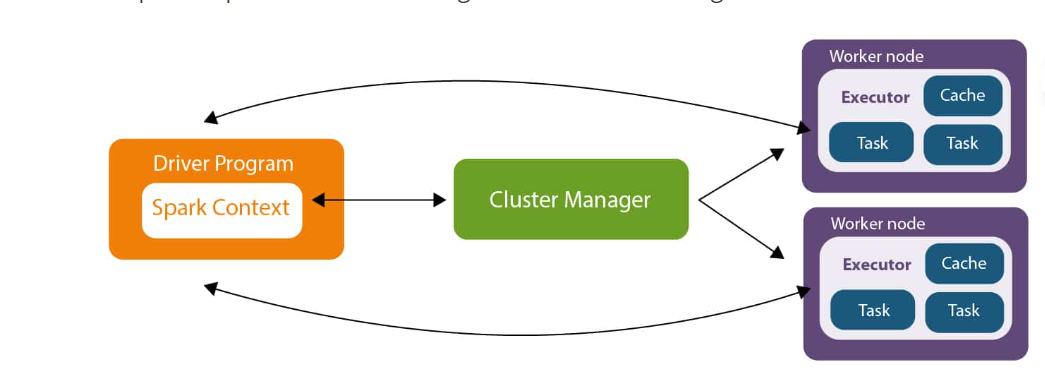

##Life Cycle of Spark Application

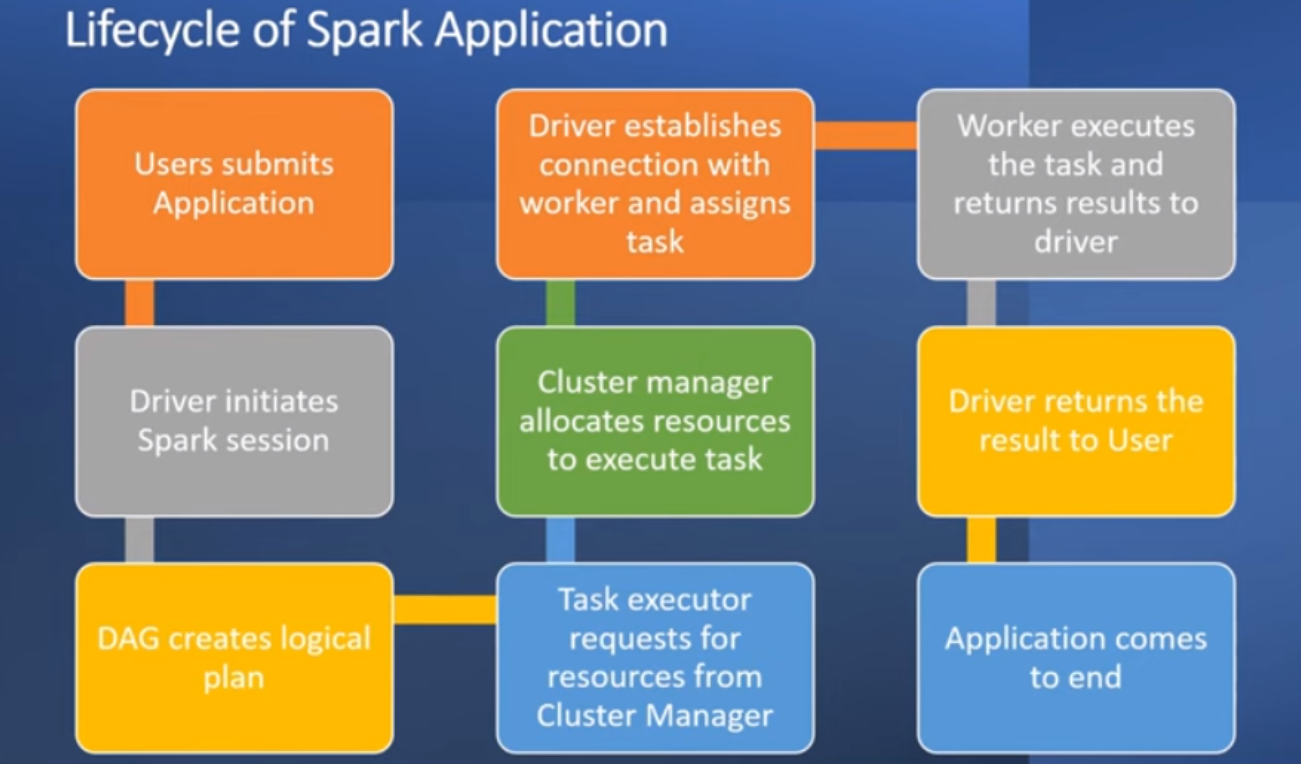

##Key Features of Pyspark

Reading material https://www.knowledgehut.com/tutorials/apache-spark-tutorial/apache-spark-features
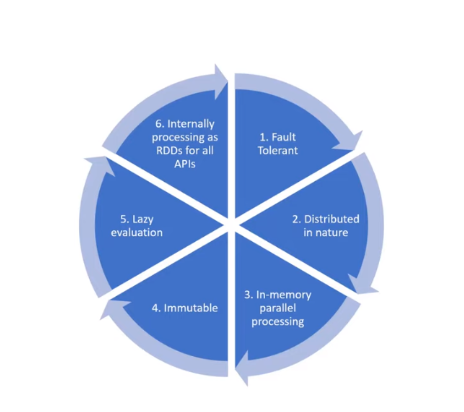

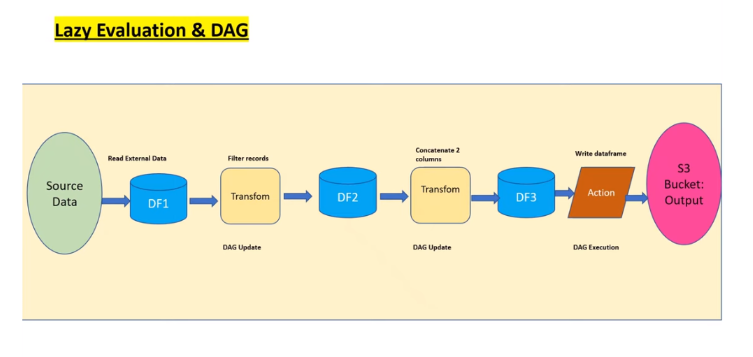

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=30d2e1e977e74ab616aa430fcfec280684dd4a9bce831edac5ddaa4a6bf53471
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
import pyspark
from pyspark.sql import SparkSession

In [3]:
spark=SparkSession.builder.appName('Dataframe').getOrCreate()

In [4]:
spark

In [6]:
dataframe=spark.read.option('header','true').csv('set_1.csv',inferSchema=True)

In [8]:
dataframe.show()

+------+---+----------+------+
|  Name|age|Experience|Salary|
+------+---+----------+------+
|  Mark| 31|        10| 30000|
|  Jack| 30|         8| 25000|
| Sunny| 29|         4| 20000|
|  Paul| 24|         3| 20000|
|  Rick| 21|         1| 15000|
|  Jose| 23|         2| 18000|
|Franco| 24|         4| 22000|
+------+---+----------+------+



In [7]:
dataframe.printSchema()

root
 |-- Name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- Experience: integer (nullable = true)
 |-- Salary: integer (nullable = true)



##Selecting columns from a Datafarme

In [9]:
dataframe.select(['Name','Experience']).show()

+------+----------+
|  Name|Experience|
+------+----------+
|  Mark|        10|
|  Jack|         8|
| Sunny|         4|
|  Paul|         3|
|  Rick|         1|
|  Jose|         2|
|Franco|         4|
+------+----------+



In [10]:
dataframe.describe().show()

+-------+------+-----------------+-----------------+------------------+
|summary|  Name|              age|       Experience|            Salary|
+-------+------+-----------------+-----------------+------------------+
|  count|     7|                7|                7|                 7|
|   mean|  NULL|             26.0|4.571428571428571|21428.571428571428|
| stddev|  NULL|3.915780041490243| 3.25868802112869| 4894.116973712516|
|    min|Franco|               21|                1|             15000|
|    max| Sunny|               31|               10|             30000|
+-------+------+-----------------+-----------------+------------------+



##Adding columns to a dataframe

In [11]:
dataframe_add_columns =dataframe.withColumn('Hike after 1 year ',dataframe['Salary']*1.2)

In [12]:
dataframe_add_columns.show()

+------+---+----------+------+------------------+
|  Name|age|Experience|Salary|Hike after 1 year |
+------+---+----------+------+------------------+
|  Mark| 31|        10| 30000|           36000.0|
|  Jack| 30|         8| 25000|           30000.0|
| Sunny| 29|         4| 20000|           24000.0|
|  Paul| 24|         3| 20000|           24000.0|
|  Rick| 21|         1| 15000|           18000.0|
|  Jose| 23|         2| 18000|           21600.0|
|Franco| 24|         4| 22000|           26400.0|
+------+---+----------+------+------------------+



##Dropping the columns

In [13]:
dataframe_drop_columns=dataframe_add_columns.drop('Hike after 1 year ')

In [14]:
dataframe_drop_columns.show()

+------+---+----------+------+
|  Name|age|Experience|Salary|
+------+---+----------+------+
|  Mark| 31|        10| 30000|
|  Jack| 30|         8| 25000|
| Sunny| 29|         4| 20000|
|  Paul| 24|         3| 20000|
|  Rick| 21|         1| 15000|
|  Jose| 23|         2| 18000|
|Franco| 24|         4| 22000|
+------+---+----------+------+



In [16]:
df_2=spark.read.csv('set_2.csv',header=True,inferSchema=True)

In [17]:
df_2.show()

+-----+----+----------+------+
| Name| age|Experience|Salary|
+-----+----+----------+------+
| Nick|  31|        10| 30000|
| rick|  30|         8| 25000|
|Sunny|  29|         4| 20000|
| Paul|  24|         3| 20000|
|  Roy|  21|         1| 15000|
| Alis|  23|         2| 18000|
|Curie|NULL|      NULL| 40000|
| NULL|  34|        10| 38000|
| NULL|  36|      NULL|  NULL|
| NULL|  35|      NULL| 45000|
+-----+----+----------+------+



##Drop all the rows and columns with null values

In [18]:
df_2_na = df_2.na.drop(how="any").show()

+-----+---+----------+------+
| Name|age|Experience|Salary|
+-----+---+----------+------+
| Nick| 31|        10| 30000|
| rick| 30|         8| 25000|
|Sunny| 29|         4| 20000|
| Paul| 24|         3| 20000|
|  Roy| 21|         1| 15000|
| Alis| 23|         2| 18000|
+-----+---+----------+------+



##Filling the missing values

In [19]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['age', 'Experience', 'Salary'],
    outputCols=["{}_imputed".format(c) for c in ['age', 'Experience', 'Salary']]
    ).setStrategy("mean")

In [20]:
imputer.fit(df_2).transform(df_2).show()

+-----+----+----------+------+-----------+------------------+--------------+
| Name| age|Experience|Salary|age_imputed|Experience_imputed|Salary_imputed|
+-----+----+----------+------+-----------+------------------+--------------+
| Nick|  31|        10| 30000|         31|                10|         30000|
| rick|  30|         8| 25000|         30|                 8|         25000|
|Sunny|  29|         4| 20000|         29|                 4|         20000|
| Paul|  24|         3| 20000|         24|                 3|         20000|
|  Roy|  21|         1| 15000|         21|                 1|         15000|
| Alis|  23|         2| 18000|         23|                 2|         18000|
|Curie|NULL|      NULL| 40000|         29|                 5|         40000|
| NULL|  34|        10| 38000|         34|                10|         38000|
| NULL|  36|      NULL|  NULL|         36|                 5|         27888|
| NULL|  35|      NULL| 45000|         35|                 5|         45000|

##Filter Operations

In [21]:
df_2.filter("Salary<=20000").show()

+-----+---+----------+------+
| Name|age|Experience|Salary|
+-----+---+----------+------+
|Sunny| 29|         4| 20000|
| Paul| 24|         3| 20000|
|  Roy| 21|         1| 15000|
| Alis| 23|         2| 18000|
+-----+---+----------+------+



In [22]:
df_2.filter("Salary<=20000").select(['Name','age']).show()

+-----+---+
| Name|age|
+-----+---+
|Sunny| 29|
| Paul| 24|
|  Roy| 21|
| Alis| 23|
+-----+---+



In [23]:
df_2.filter((df_2['Salary']<=20000) |
                  (df_2['Salary']>=15000)).show()

+-----+----+----------+------+
| Name| age|Experience|Salary|
+-----+----+----------+------+
| Nick|  31|        10| 30000|
| rick|  30|         8| 25000|
|Sunny|  29|         4| 20000|
| Paul|  24|         3| 20000|
|  Roy|  21|         1| 15000|
| Alis|  23|         2| 18000|
|Curie|NULL|      NULL| 40000|
| NULL|  34|        10| 38000|
| NULL|  35|      NULL| 45000|
+-----+----+----------+------+



In [24]:
df_2.filter(~(df_2['Salary']<=20000)).show()

+-----+----+----------+------+
| Name| age|Experience|Salary|
+-----+----+----------+------+
| Nick|  31|        10| 30000|
| rick|  30|         8| 25000|
|Curie|NULL|      NULL| 40000|
| NULL|  34|        10| 38000|
| NULL|  35|      NULL| 45000|
+-----+----+----------+------+



Task-1:
Explain below concepts in your own words:
1. Directed Acyclic Graph
2. Lazy Evaluation
3. Fault Tolerance
4. Resilient Distributed Datasets(RDD's)

Task-2: Take a dataset of your own that contains atleast 10 rows and 6 columns and complete the following transformations
1. Select the columns ranging from index 2 to 5
2. Add 2 columns with necessary data
3. Fill the missing values with median value
4. Apply any two filter conditions for the dataset you have taken


Task-3: Describe the transformations performed and your take on the activity.

